## Support Vector Regression

---

## Importing libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


-

## Importing the dataset

In [7]:
df=pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [12]:
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [13]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [14]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

----

In [16]:
y=y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)

In [18]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [19]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training The SVR Model On Whole Dataset

In [20]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(x,y)

C:\Users\Md.Abdullah\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Predicting a new result

In [23]:
p=svr.predict(sc_x.fit_transform([[6.5]]))

In [24]:
sc_y.inverse_transform(p)

array([131106.77303274])

## Visualizing the SVR results

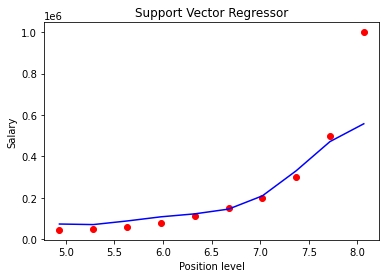

In [26]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(svr.predict(x)),color='blue')
plt.title('Support Vector Regressor')
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

## Visualizing the SVR results for higher resolution and smoother curve

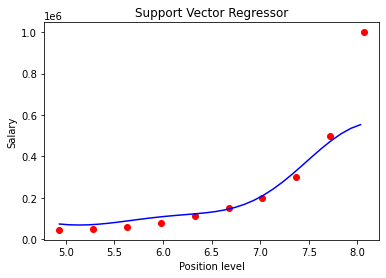

In [36]:
X_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(svr.predict(sc_x.transform(X_grid))), color = 'blue')

plt.title('Support Vector Regressor')
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()